In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [16]:
multiplication_summary_path = "../summaries/2024-01-22-multiplication_summary.csv"
multiply_primed_names = {'Multiply', 'Multiply, primed with carry',
       'Multiply, primed with concatenate',
       'Multiply, primed with multiply with 1 digit',
       'Multiply, primed with sum', 'Multiply, primed with exponentiate',
       'Multiply, primed with subtract', 'Multiply, primed with reverse'}

string_summary_path = "../summaries/2024-01-29-string_summary.csv"
string_primed_names = {'WLO',
       'WLO primed with uppercase', 'WLO primed with remove first',
       'WLO primed with concatenate', 'WLO primed with exponentiate',
       'WLO primed with subtract', 'WLO primed with reverse'}

multiplication_summary_df = pd.read_csv(multiplication_summary_path)
string_summary_df = pd.read_csv(string_summary_path)

multiplication_summary_df["model"] = multiplication_summary_df["model"].apply(lambda x: x.split("/")[-1])
string_summary_df["model"] = string_summary_df["model"].apply(lambda x: x.split("/")[-1])

multiplication_summary_df["prompt"] = multiplication_summary_df["prompt"].apply(lambda x: x.replace(", primed with ", " + "))
multiply_primed_names = {x.replace(", primed with ", " + ") for x in multiply_primed_names}
string_summary_df["prompt"] = string_summary_df["prompt"].apply(lambda x: x.replace(", primed with ", " + "))
string_primed_names = {x.replace(", primed with ", " + ") for x in string_primed_names}

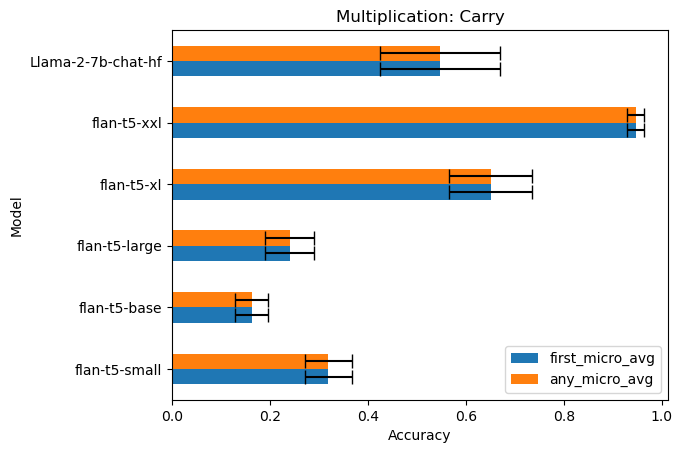

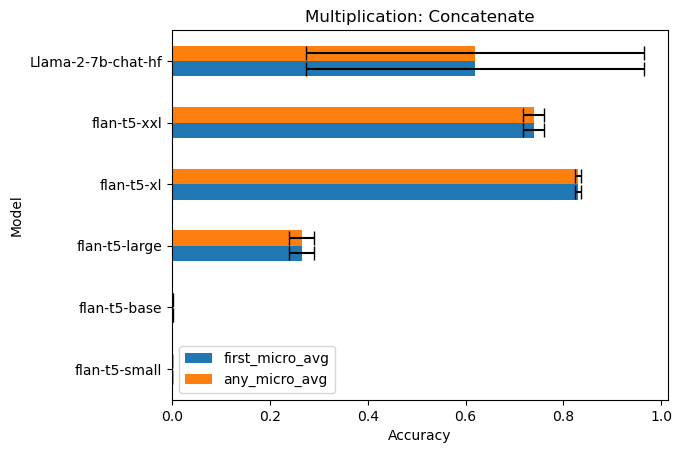

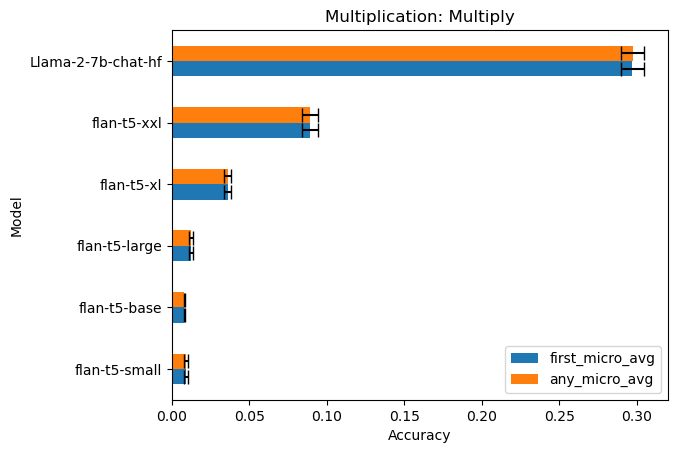

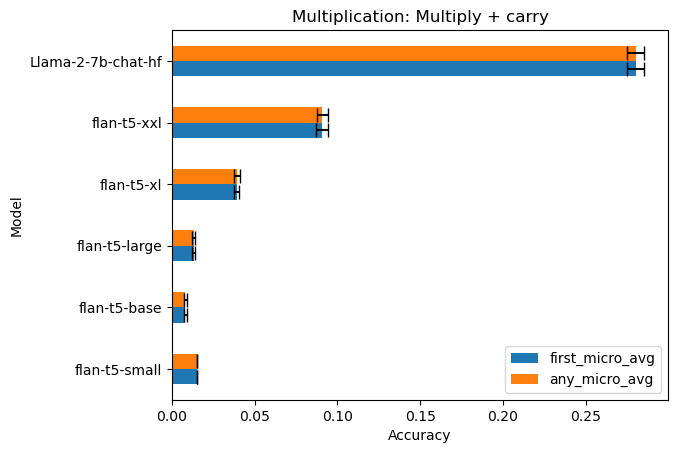

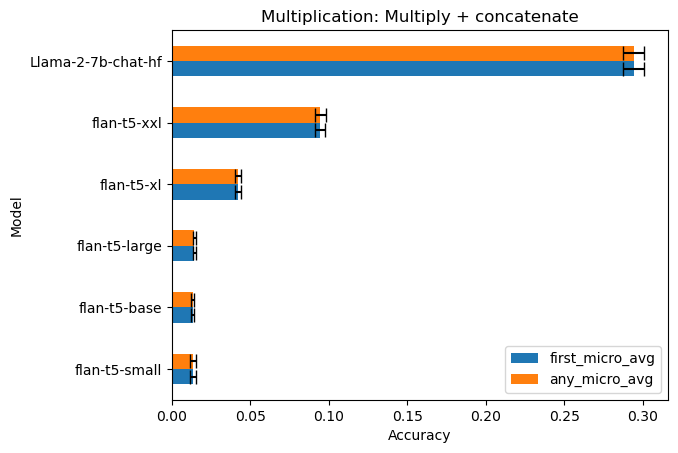

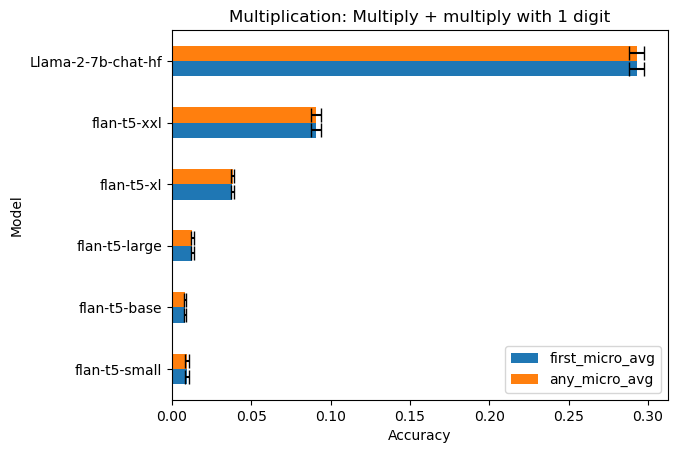

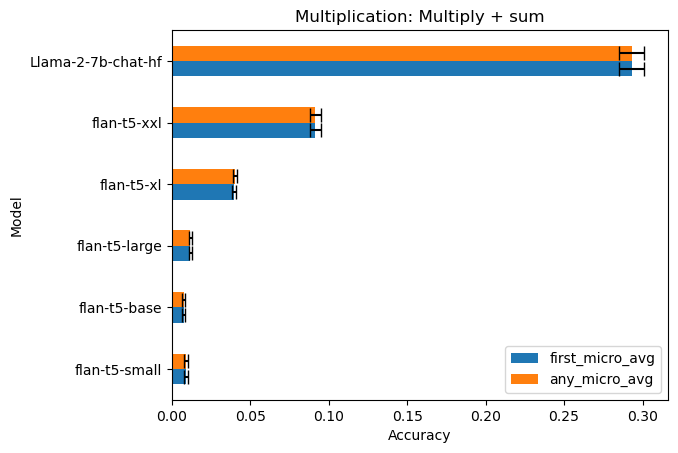

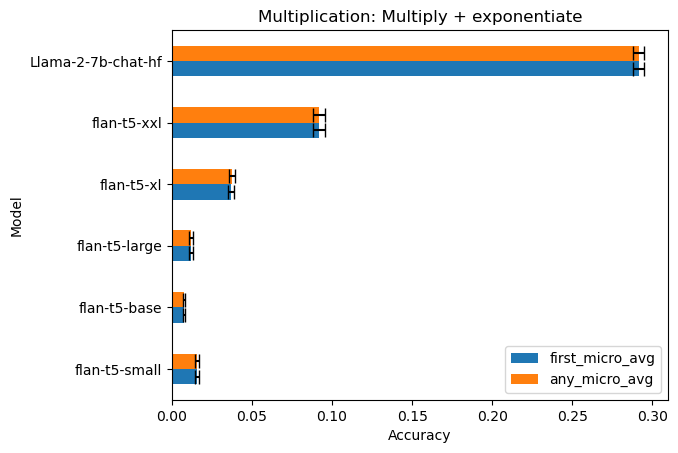

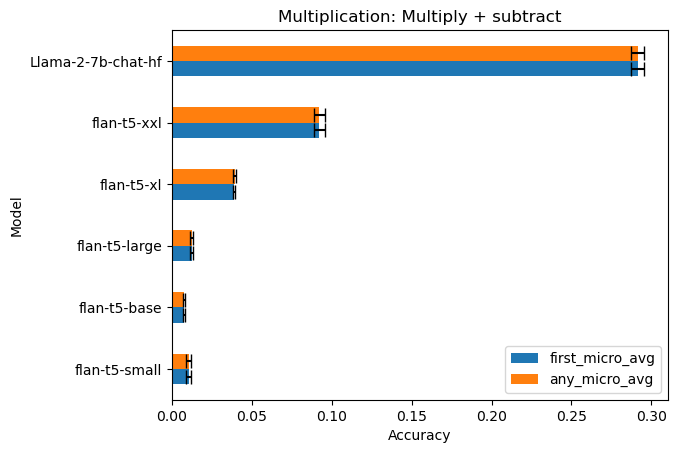

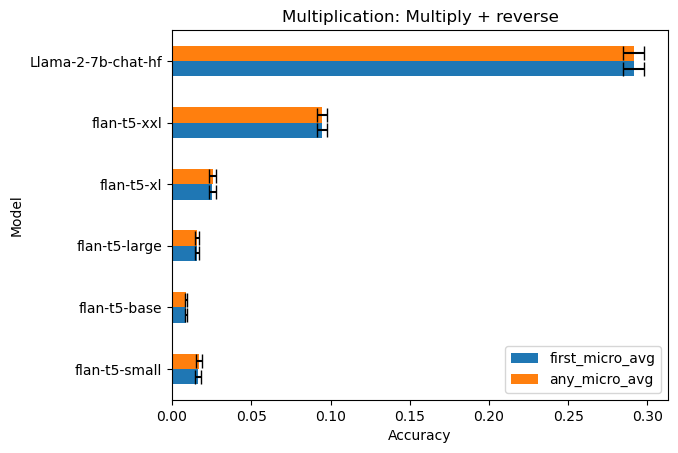

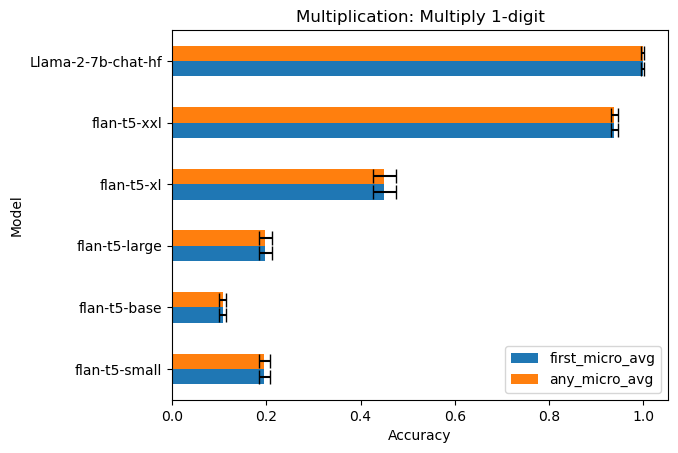

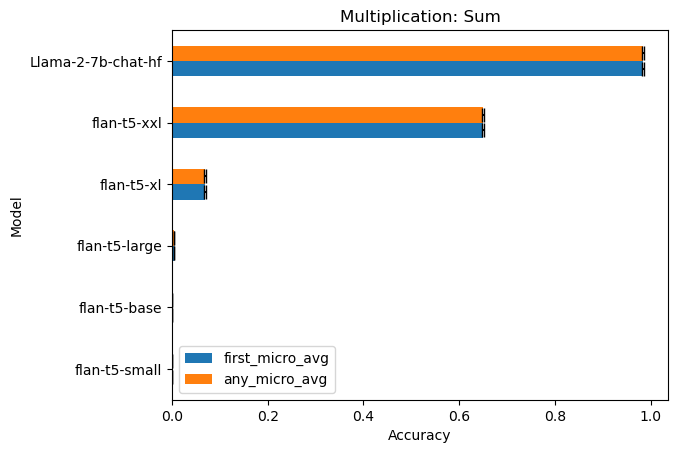

In [17]:
output_path = os.path.splitext(multiplication_summary_path)[0]
os.makedirs(output_path, exist_ok=True)
for experiment_name in pd.unique(multiplication_summary_df["prompt"]):
    experiment_df = multiplication_summary_df[multiplication_summary_df["prompt"] == experiment_name].reset_index()
    error_df = {"first_micro_avg": experiment_df["first_micro_std"], "any_micro_avg": experiment_df["any_micro_std"]}
    ax = experiment_df.plot(x="model", y=["first_micro_avg", "any_micro_avg"], xerr=error_df, kind="barh", capsize=5, title=f"Multiplication: {experiment_name}")
    ax.set_xlabel("Accuracy")
    ax.set_ylabel("Model")
    ax.get_figure().savefig(os.path.join(os.path.splitext(multiplication_summary_path)[0], f"{experiment_name}.png"), bbox_inches="tight")

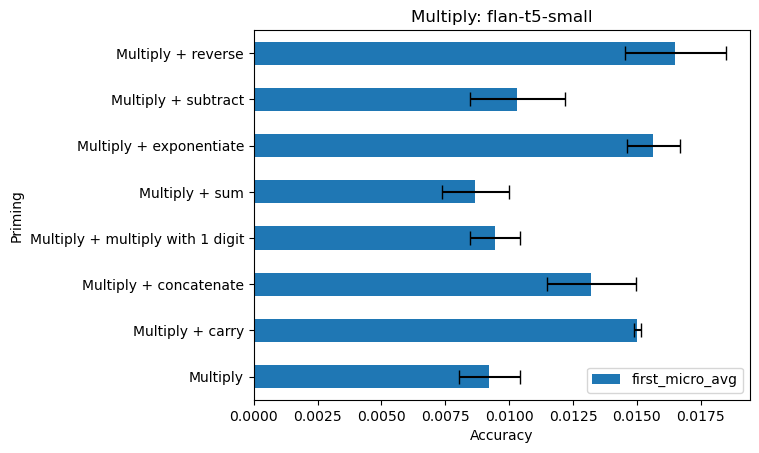

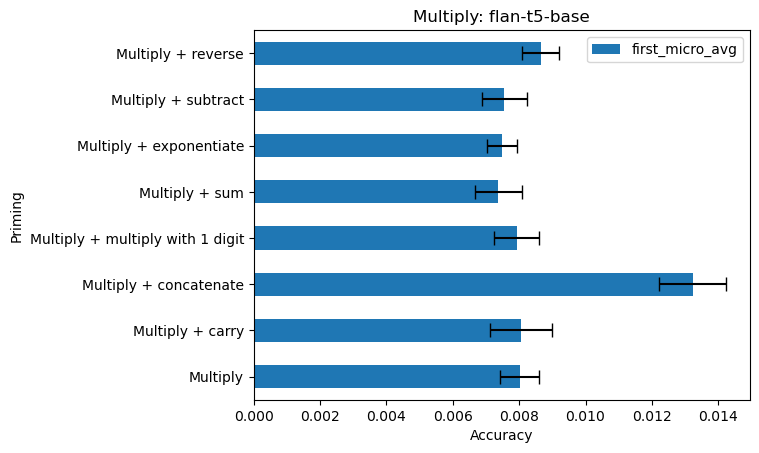

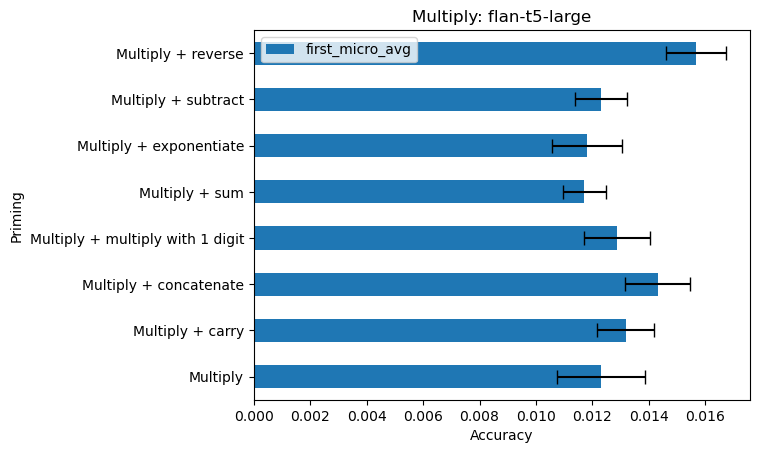

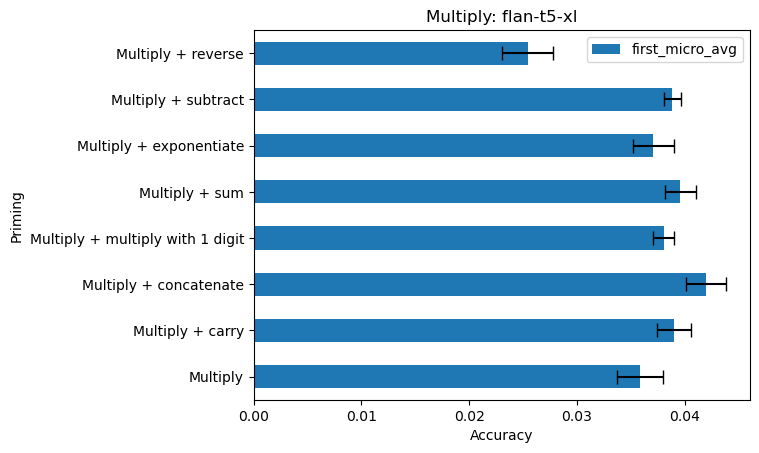

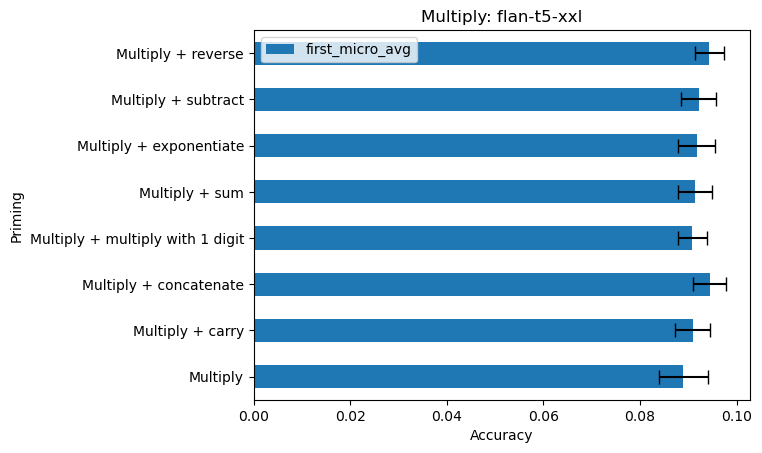

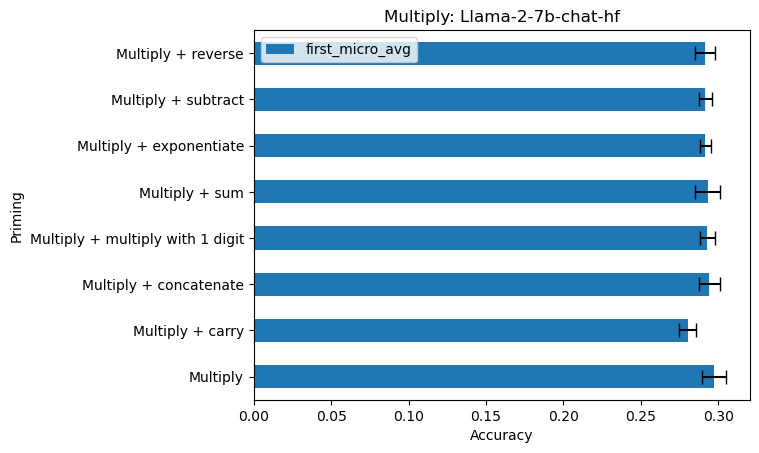

In [18]:
multiply_primed_df = multiplication_summary_df[multiplication_summary_df["prompt"].isin(multiply_primed_names)].reset_index()
for model_name in pd.unique(multiplication_summary_df["model"]):
    experiment_df = multiply_primed_df[multiply_primed_df["model"] == model_name].reset_index()
    error_df = {"first_micro_avg": experiment_df["first_micro_std"]}
    ax = experiment_df.plot(x="prompt", y=["first_micro_avg"], xerr=error_df, kind="barh", capsize=5, title=f"Multiply: {model_name}")
    ax.set_xlabel("Accuracy")
    ax.set_ylabel("Priming")
    ax.get_figure().savefig(os.path.join(os.path.splitext(multiplication_summary_path)[0], f"{model_name}.png"), bbox_inches="tight")

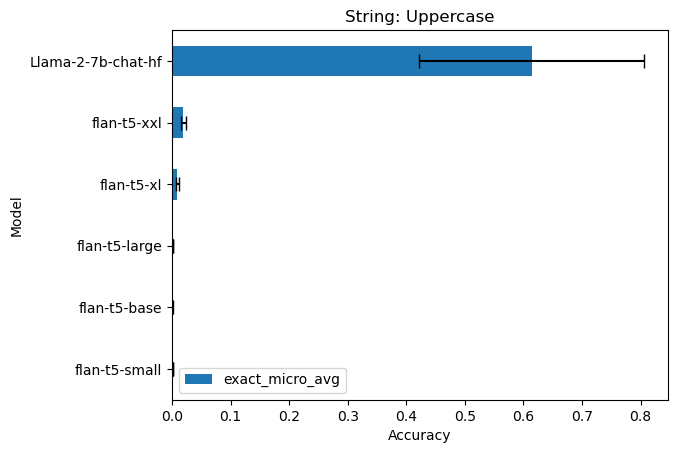

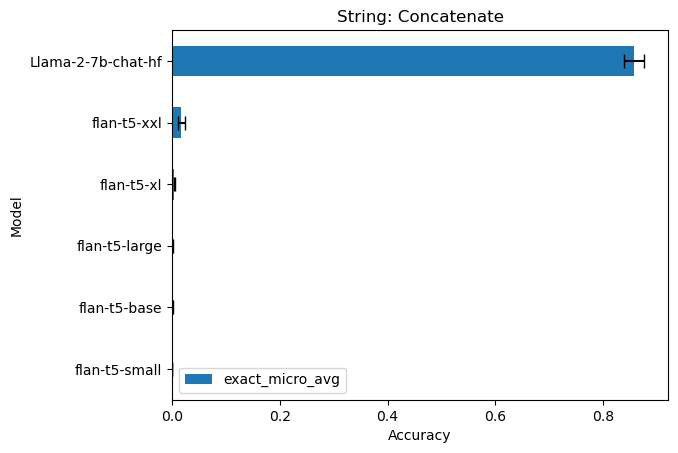

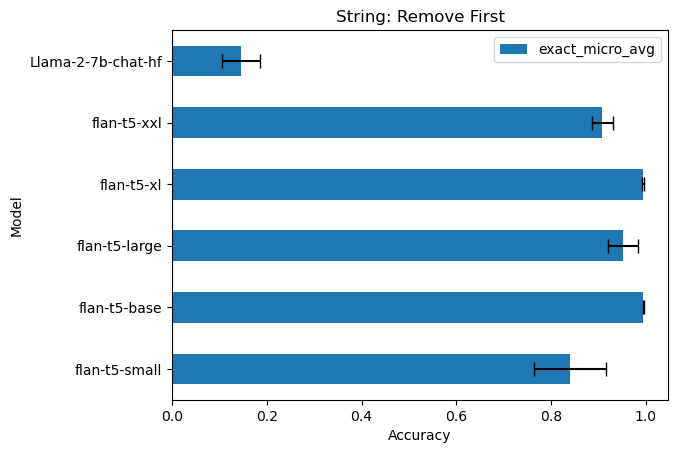

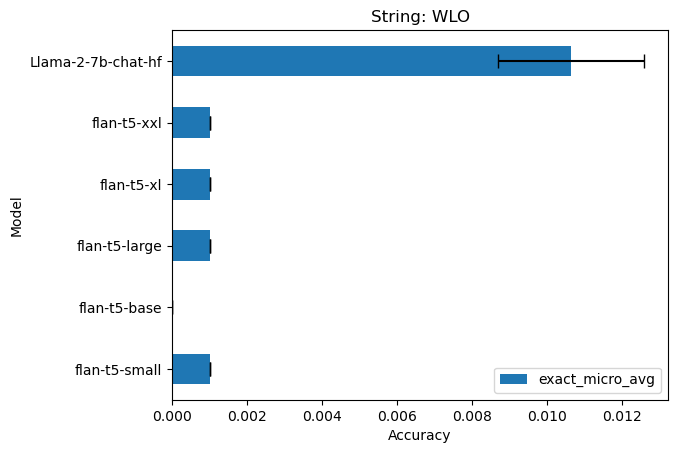

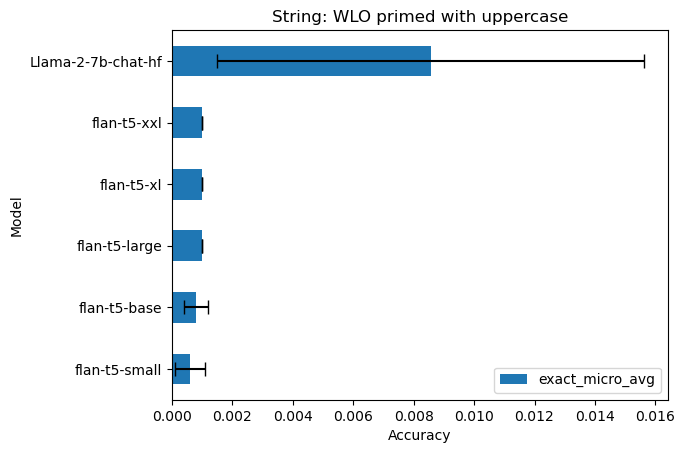

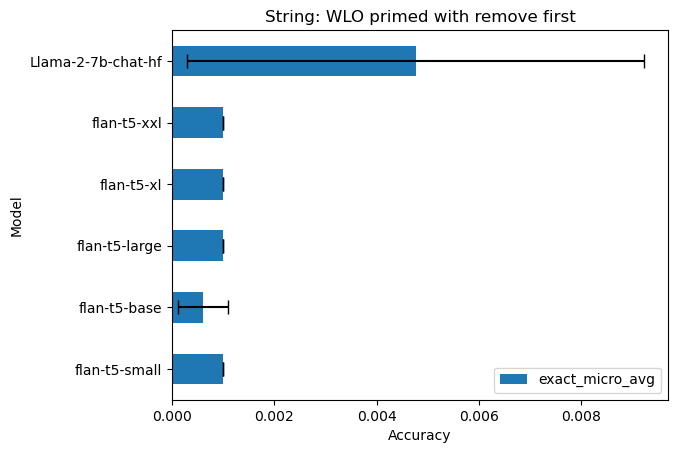

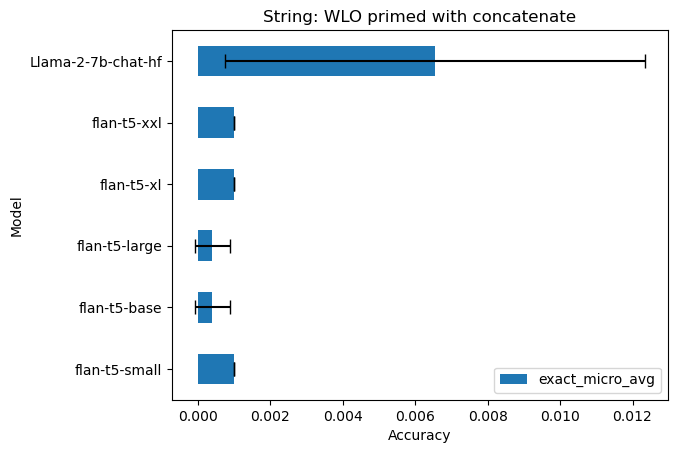

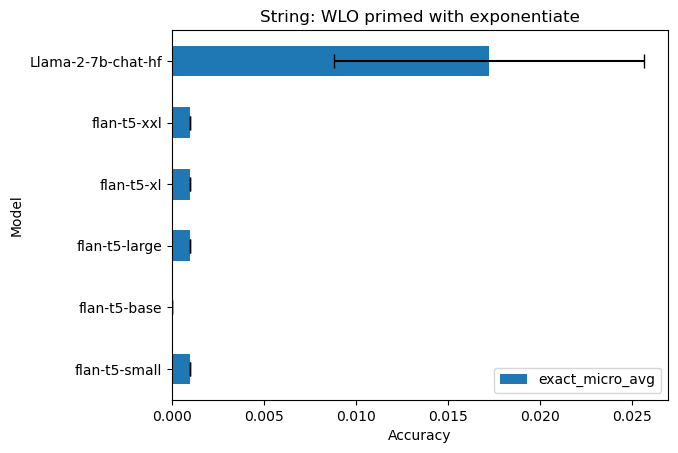

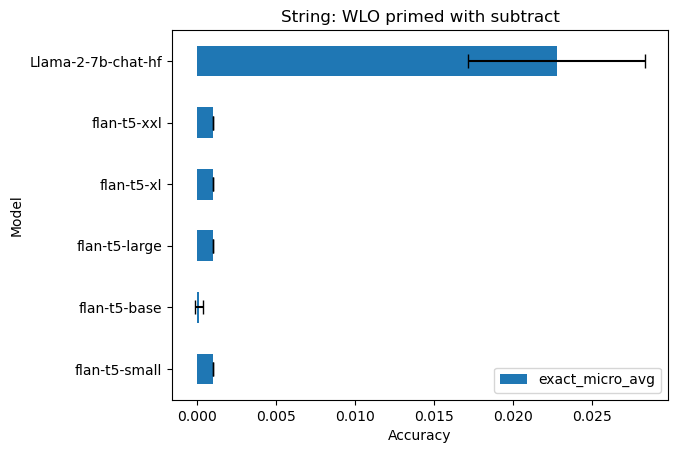

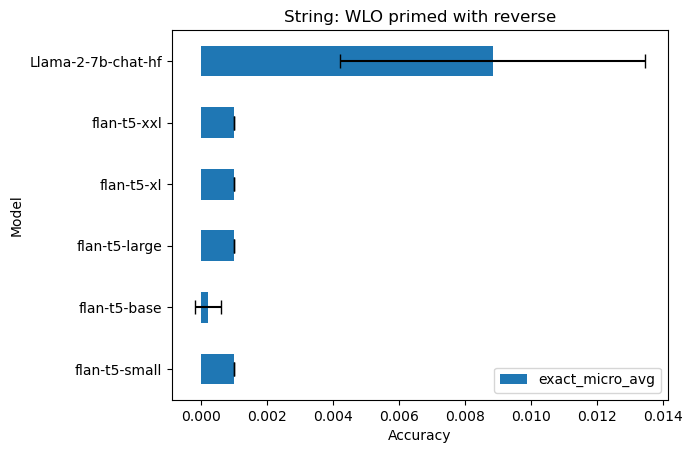

In [19]:
output_path = os.path.splitext(string_summary_path)[0]
os.makedirs(output_path, exist_ok=True)
for experiment_name in pd.unique(string_summary_df["prompt"]):
    experiment_df = string_summary_df[string_summary_df["prompt"] == experiment_name].reset_index()
    error_df = {"exact_micro_avg": experiment_df["exact_micro_std"]}
    ax = experiment_df.plot(x="model", y=["exact_micro_avg"], xerr=error_df, kind="barh", capsize=5, title=f"String: {experiment_name}")
    ax.set_xlabel("Accuracy")
    ax.set_ylabel("Model")
    ax.get_figure().savefig(os.path.join(os.path.splitext(string_summary_path)[0], f"{experiment_name}.png"), bbox_inches="tight")

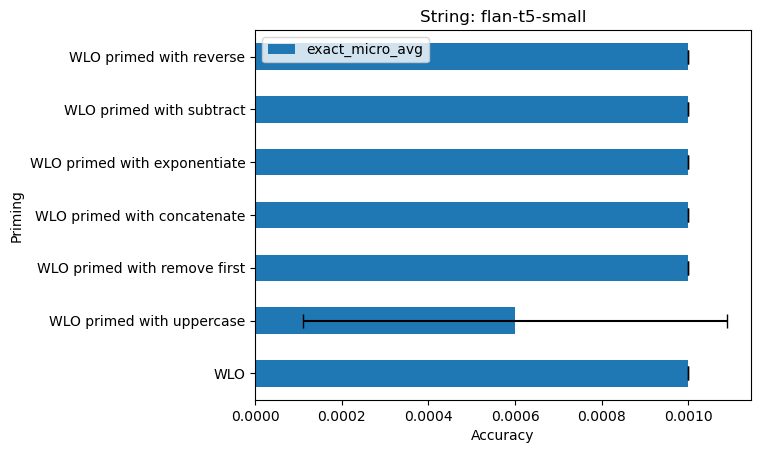

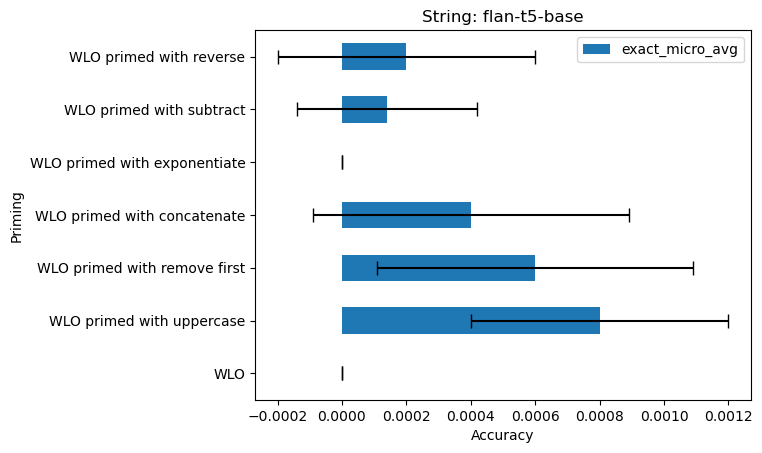

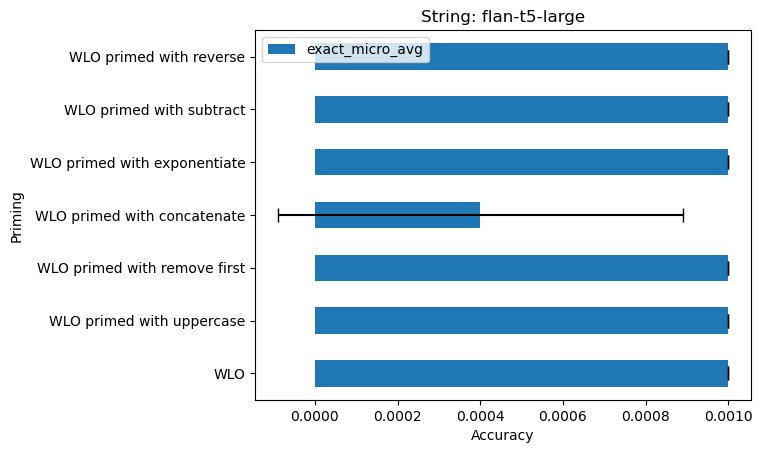

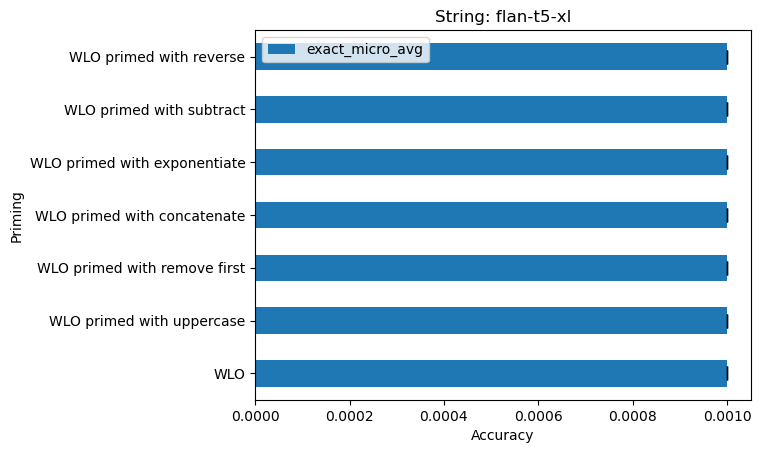

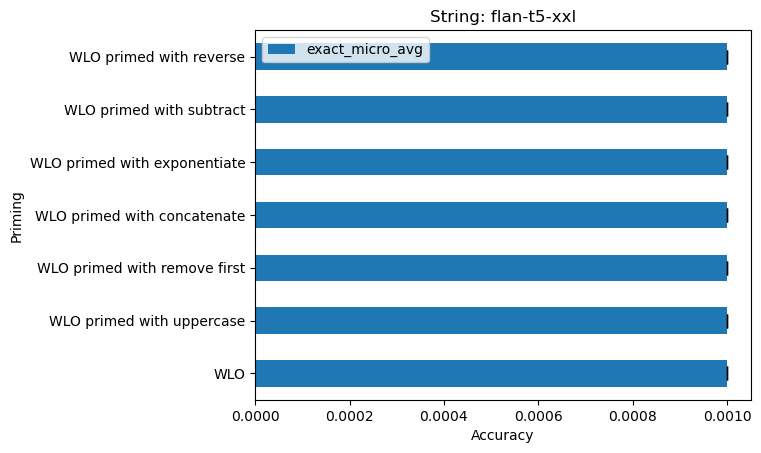

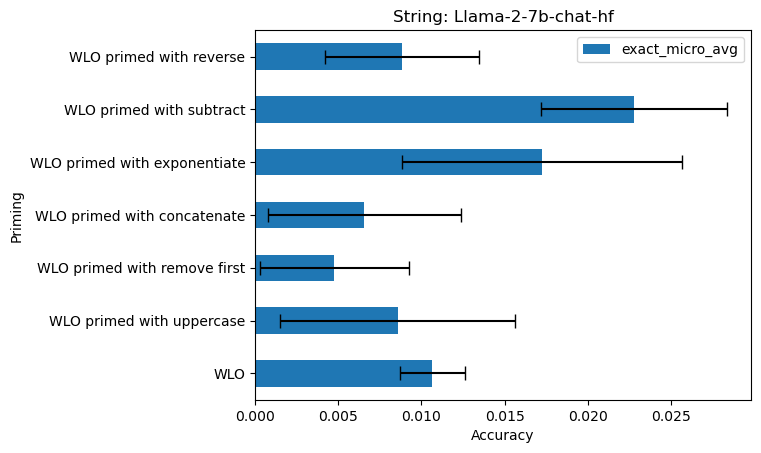

In [20]:
string_primed_df = string_summary_df[string_summary_df["prompt"].isin(string_primed_names)].reset_index()
for model_name in pd.unique(string_summary_df["model"]):
    experiment_df = string_primed_df[string_primed_df["model"] == model_name].reset_index()
    error_df = {"exact_micro_avg": experiment_df["exact_micro_std"]}
    ax = experiment_df.plot(x="prompt", y=["exact_micro_avg"], xerr=error_df, kind="barh", capsize=5, title=f"String: {model_name}")
    ax.set_xlabel("Accuracy")
    ax.set_ylabel("Priming")
    ax.get_figure().savefig(os.path.join(os.path.splitext(string_summary_path)[0], f"{model_name}.png"), bbox_inches="tight")